# Arrhytmia Dataset

### Dataset Information

| **Dataset** 	| **Points** 	| **Dimensions** 	| **Outliers (%)** 	|
|:-----------:	|:----------:	|:--------------:	|:----------------:	|
|     Arrhytmia    	|     452    	|       274       	|     66 (15.5%)    	|

The Arrhythmia dataset, sourced from the UCI Machine Learning Repository, is a multi-class classification dataset featuring high-dimensional data with:
* 279 attributes. 
In this version of the dataset, five categorical attributes have been excluded, resulting in a total of 274 numerical attributes.

To simplify the classification task, the dataset's original classes have been reorganized into two main categories:

* Inliers Class: This class comprises the majority of the dataset, formed by combining all original classes except for the smallest ones.

* Outliers Class: This class is created by merging the smallest original classes (specifically, classes 3, 4, 5, 7, 8, 9, 14, and 15).

In [1]:
# import libraries
import numpy as np
import pingouin

from openset.models import IRW_score, lof, mahalanobis, template
from openset.tools import dataset_tool, visualization_tool

In [2]:
X_train, X_test, y_train, y_test = dataset_tool.load_data(data_path='../data/arrhythmia.mat',
                                                          test_size=0.2,
                                                          random_state=42)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 274), (361, 1), (91, 274), (91, 1))

### LOF

### GOOD ACCURACY

In [4]:
lof_y_pred_train_g, lof_y_score_train_g, lof_model_g = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 25,
                                      contamination = 'auto',
                                      leaf_size = 25,
                                      metric = "minkowski",
                                      p = 1)

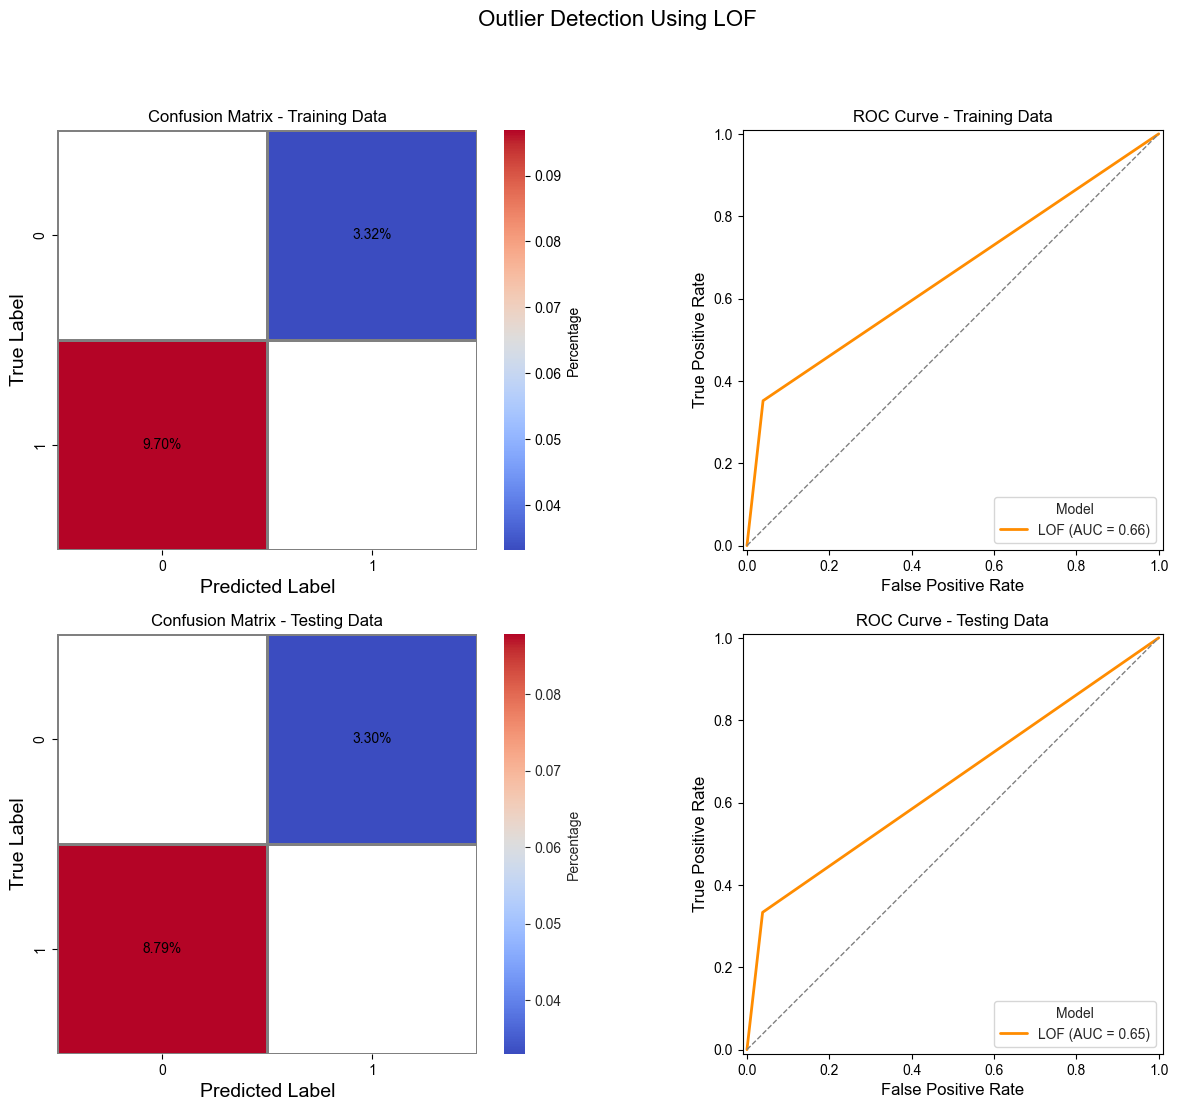

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [5]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test,
                           train_pred=None,
                           test_pred=None,
                           novelty=False,
                           n_neighbors=25,
                           contamination='auto',
                           leaf_size=100,
                           metric="minkowski", p=1)

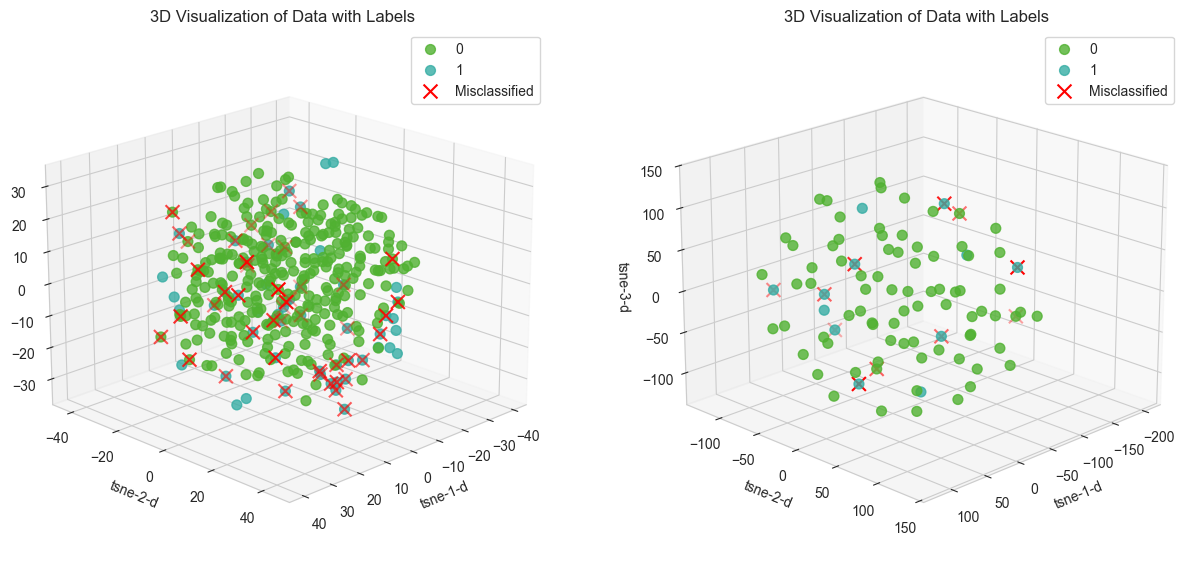

In [6]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, lof_model_g, lof_y_pred_train_g)

In [7]:
lof_y_pred_test_g, lof_y_score_test_g = lof.lof_predict_test(lof_model_g, X_test)

In [8]:
df_train = lof.lof_dataframe(y_train, lof_y_pred_train_g, lof_y_score_train_g)
df_test = lof.lof_dataframe(y_test, lof_y_pred_test_g, lof_y_score_test_g)

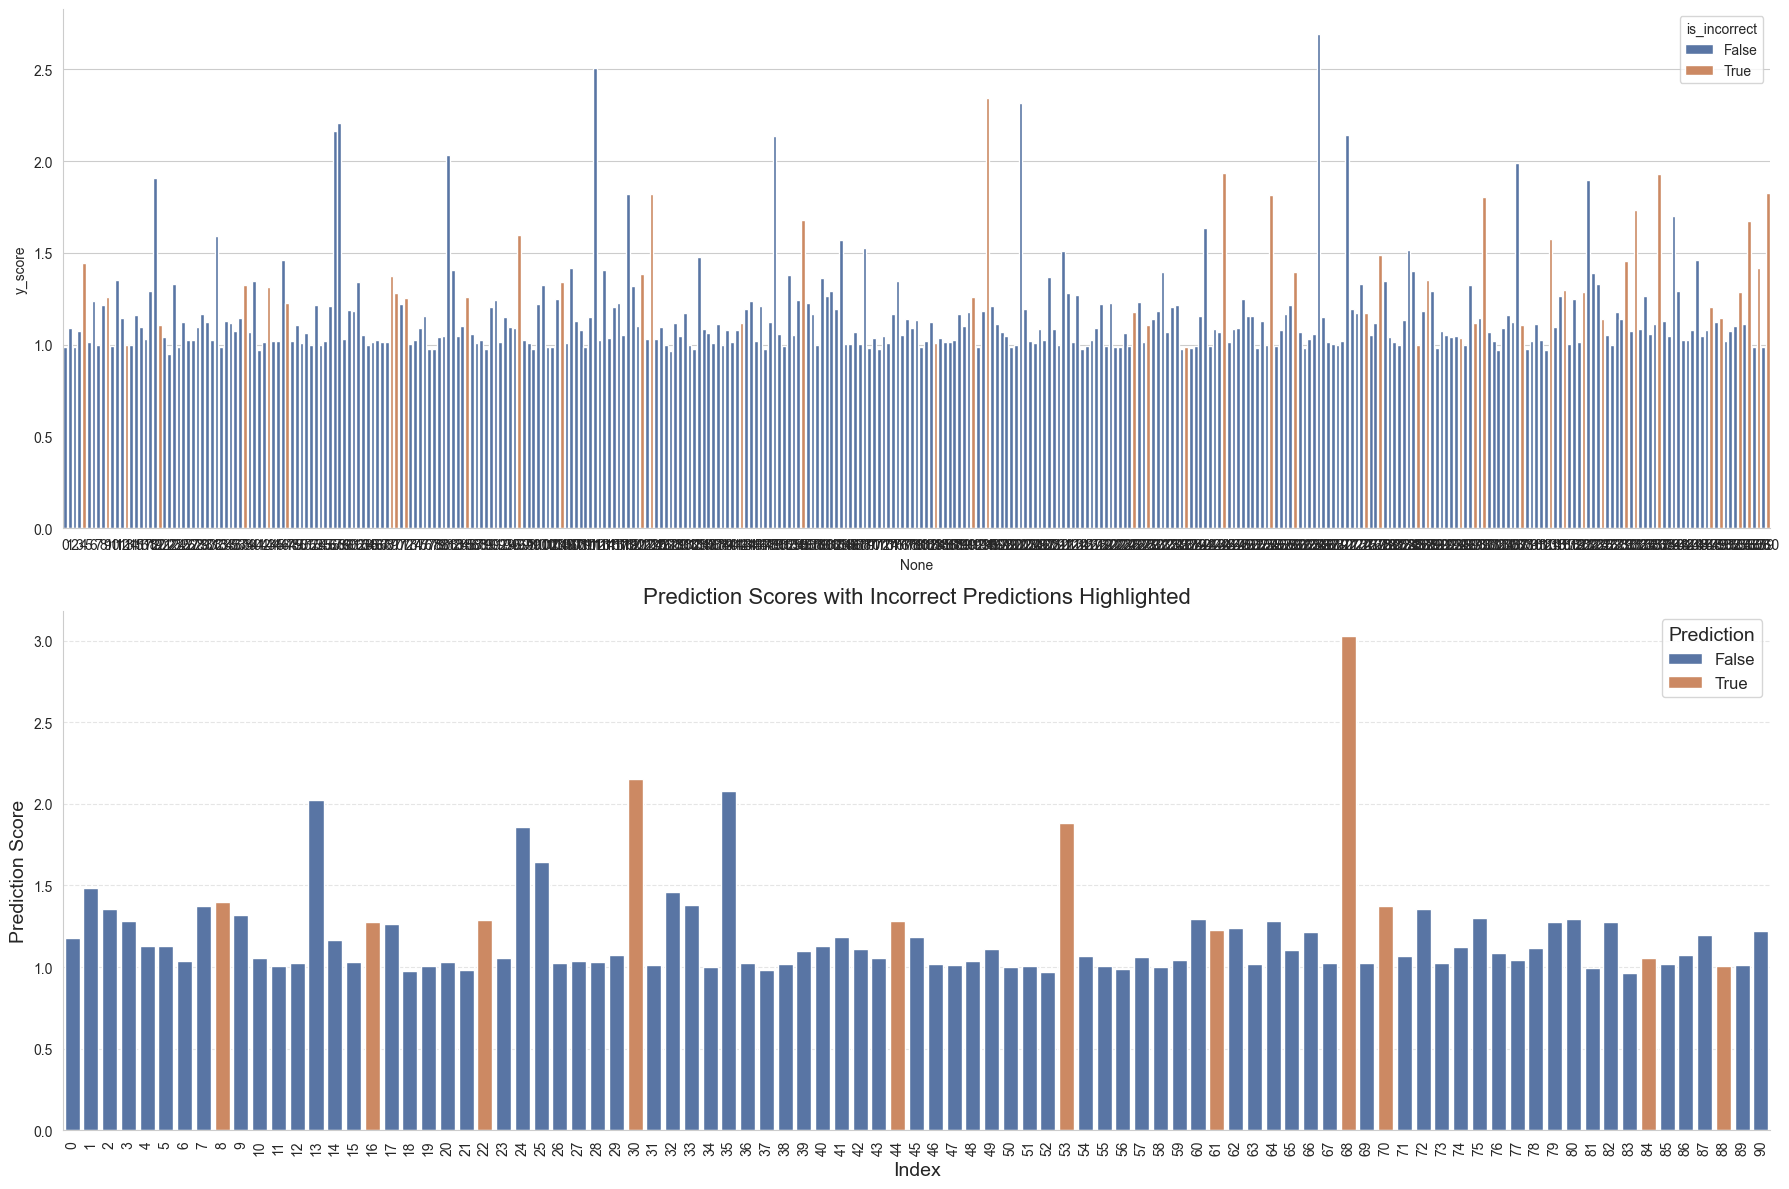

In [9]:
visualization_tool.lof_visualize_bar(df_train, df_test)

### Reasons for Poor LOF Performance

1. **High Dimensionality**:
* Distance Concentration: In high-dimensional spaces, the distances between points tend to converge, making it hard to differentiate between nearby and faraway points. This reduces the effectiveness of density-based measures like LOF.

* Sparsity: Points become sparse in high-dimensional space, which makes the estimation of local densities less reliable.

2. **Complexity of Arrhythmic Patterns**:

* Arrhythmic conditions may manifest through complex interactions between numerous attributes. LOF, which primarily relies on local density estimation, might not capture these complex relationships well.

3. **Parameters Sensivity**:

* The number of neighbors (25 in this case) used by LOF to determine local density might not be optimal. However it's really hard to determine better value. In high-dimensional data, finding the right balance for n_neighbors is crucial; too few neighbors might make the model sensitive to noise, while too many could average out significant local density differences.

* The algorithm uses the Minkowski distance with p=1. While this can be effective in some cases, it might not be the best choice for all features in the dataset, especially when the dataset is high-dimensional and diverse.

### Bad accuracy

In [10]:
lof_y_pred_train_b, lof_y_score_train_b, lof_model_b = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 4,
                                      contamination = 'auto',
                                      leaf_size = 2,
                                      metric = "minkowski",
                                      p = 1)

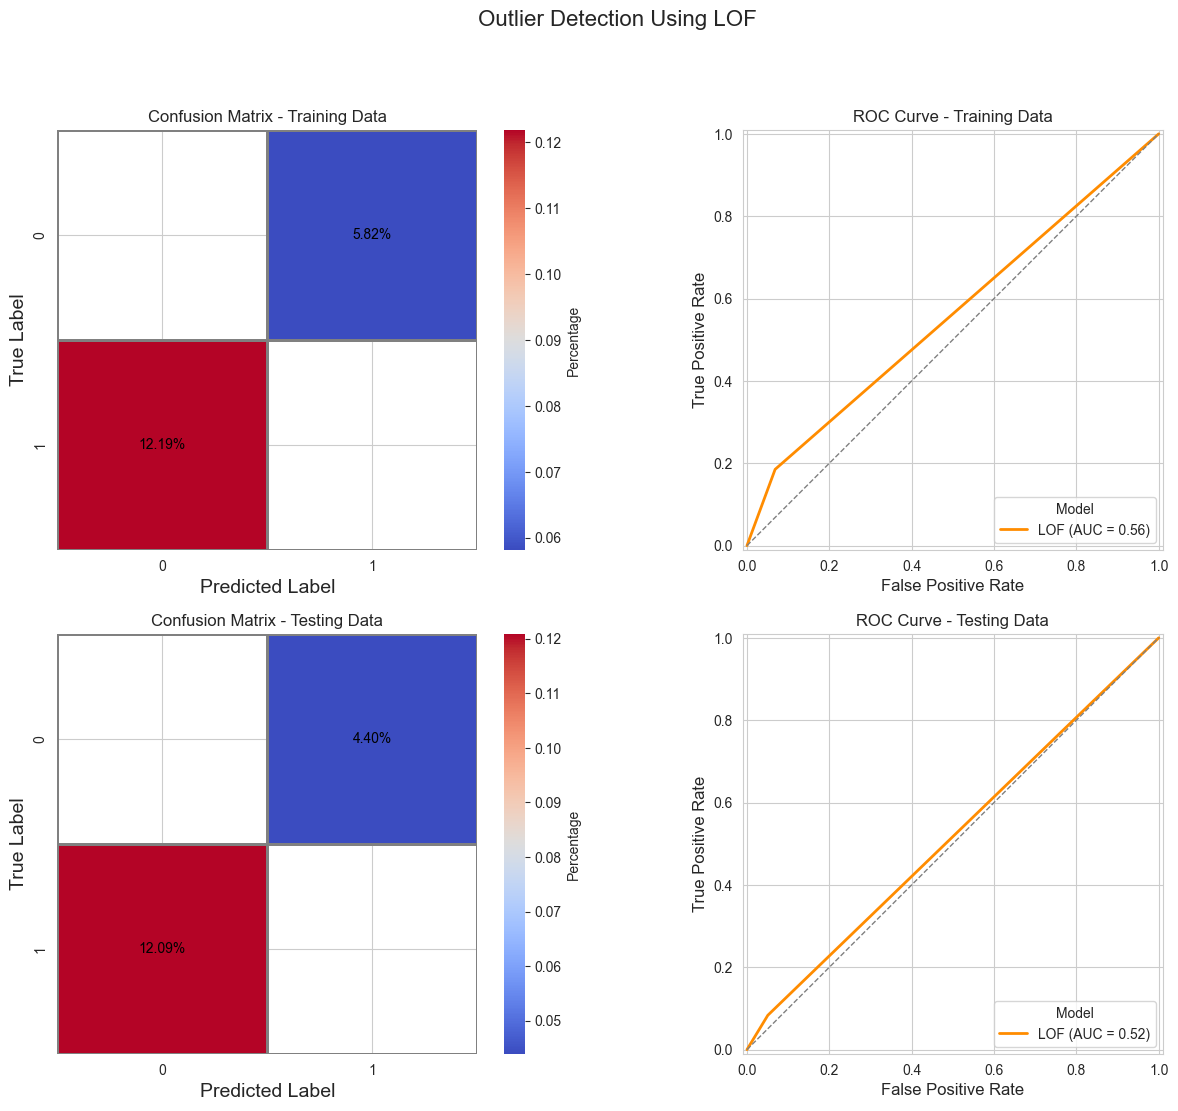

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [11]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test,
                           train_pred=None,
                           test_pred=None,
                           novelty=False,
                           n_neighbors=4,
                           contamination='auto',
                           leaf_size=2,
                           metric="minkowski", p=1)

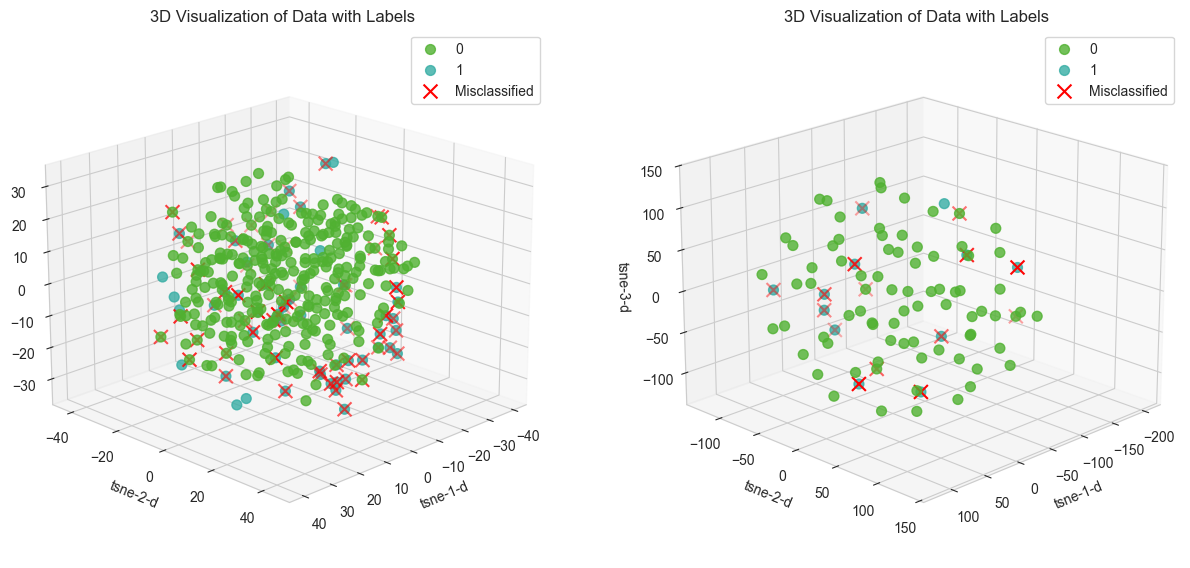

In [12]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, lof_model_b, lof_y_pred_train_b)

In [13]:
lof_y_pred_test_b, lof_y_score_test_b = lof.lof_predict_test(lof_model_b, X_test)

In [14]:
df_train = lof.lof_dataframe(y_train, lof_y_pred_train_b, lof_y_score_train_b)
df_test = lof.lof_dataframe(y_test, lof_y_pred_test_b, lof_y_score_test_b)

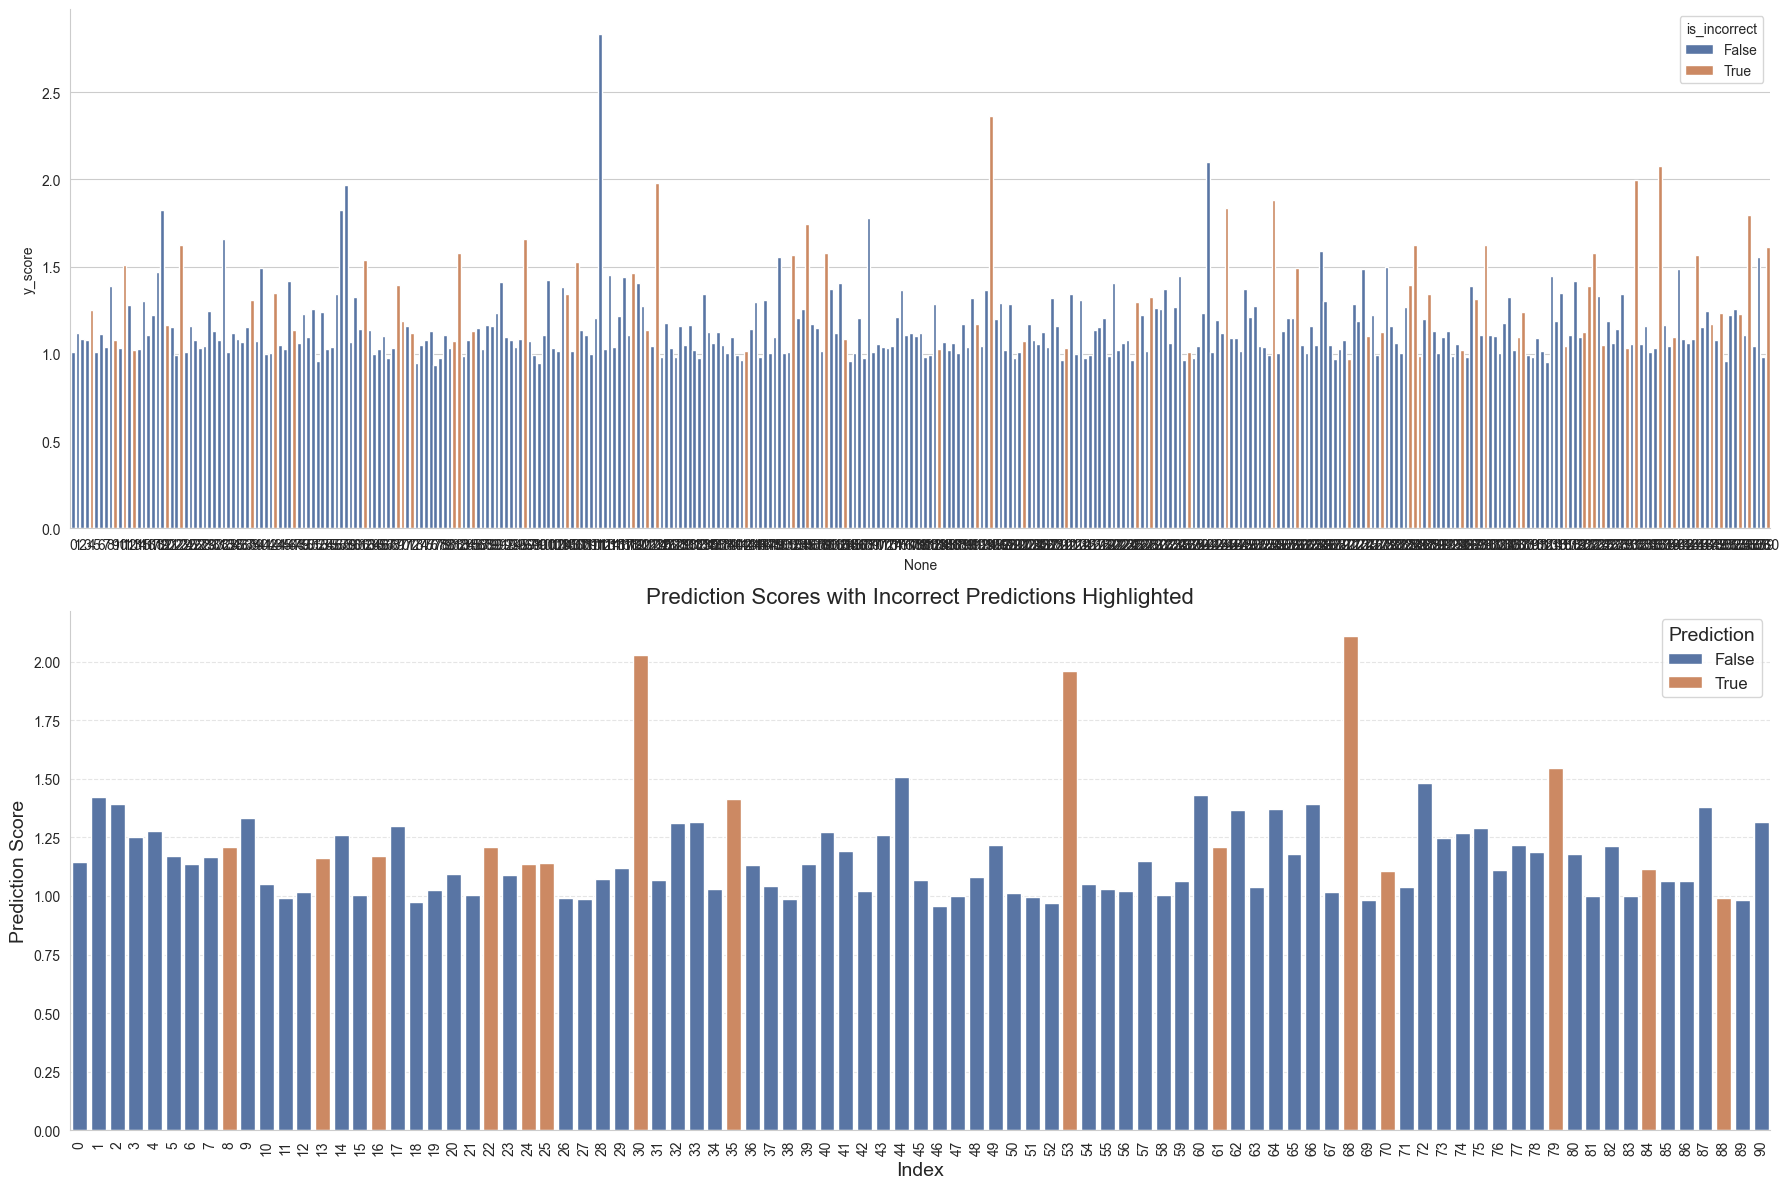

In [15]:
visualization_tool.lof_visualize_bar(df_train,
                                     df_test)

### Specific Issues Leading to Poor Performance

1. **High Sensitivity to Small Neighborhoods**:

* With only 4 neighbors, the LOF algorithm's density estimates become highly sensitive to local variations and noise. This can lead to incorrect classification of points as outliers, resulting in performance close to random guessing.

* Complexity of Arrhythmic Patterns: The arrhythmic patterns in the dataset may span across multiple dimensions, requiring a larger neighborhood to accurately capture their local structure.

2. **Unstable and Unreliable Density Estimates**:

* In high-dimensional spaces, reliable density estimation typically requires a larger number of neighbors. The choice of 4 neighbors means that the density estimates are based on very limited information, leading to unstable and unreliable LOF scores.

3. **Computational Inefficiency**:

* While `leaf_size=2` primarily impacts computational performance, it might contribute to inefficiencies in neighbor searches. In very high-dimensional spaces, efficient neighbor searches are crucial for accurate density estimation.

Conclusion

The combination of `n_neighbors=4`, `contamination='auto'`, `leaf_size=2`, `metric="minkowski"`, and `p=1` results in LOF performance that approximates random guessing (AUC close to 0.5) due to the following reasons:

* High Sensitivity to Noise: Too few neighbors (4) make the model overly sensitive to noise and local variations.
* Unreliable Density Estimates: Small neighborhood size leads to unstable and unreliable density estimates, crucial for LOF's functioning.
* Inappropriate Contamination Detection: Automatic contamination detection might not accurately capture the true outlier proportion in high-dimensional, complex data.
* Computational Inefficiency: Very small leaf_size might contribute to inefficient and potentially suboptimal neighbor searches.

### Mahalanobis distance

In [16]:
## Check data normality
pingouin.multivariate_normality(X_train)

HZResults(hz=1444, pval=0.0, normal=False)

In [17]:
inliers_amount, outliers_amount = np.unique(y_train, return_counts=True)[1]
contamination = outliers_amount / inliers_amount

In [18]:
mahalanobis_y_pred_train_g, mahalanobis_model_g = mahalanobis.detect_outliers(X_train,
                                                                              contamination = contamination,
                                                                              random_state=42)

/Users/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


/Users/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


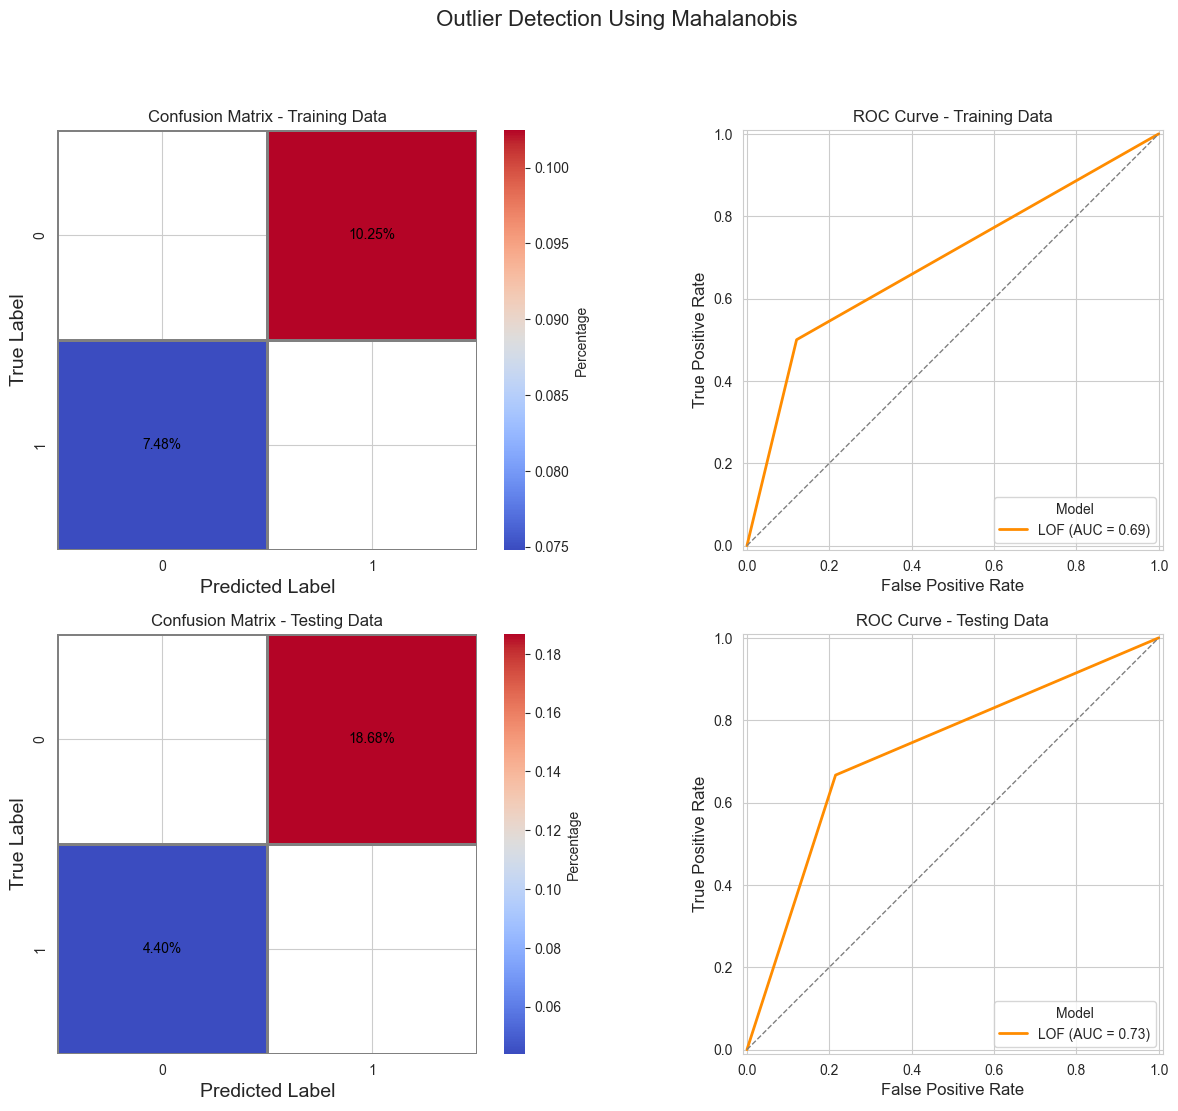

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [19]:
mahalanobis.visualize_outliers_mahalanobis(X_train,
                                           X_test,
                                           y_train,
                                           y_test,
                                           train_pred=None,
                                           test_pred=None,
                                           contamination=contamination,
                                           random_state=42)

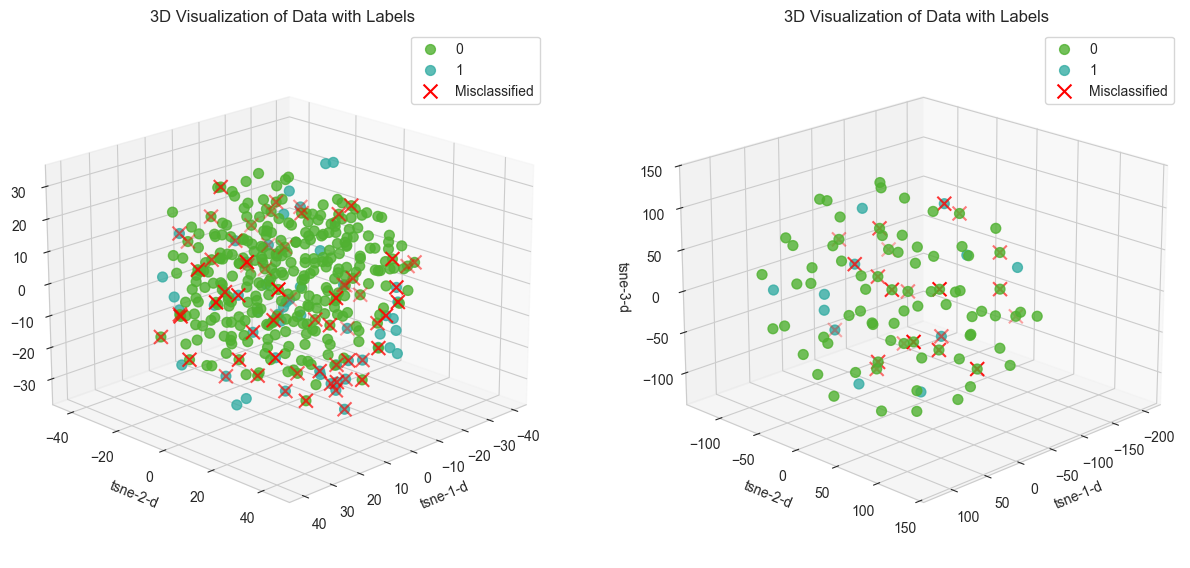

In [20]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, mahalanobis_model_g, mahalanobis_y_pred_train_g, lof=False)

In [21]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(mahalanobis_model_g,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

/Users/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Model fitting completed in 30.17 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


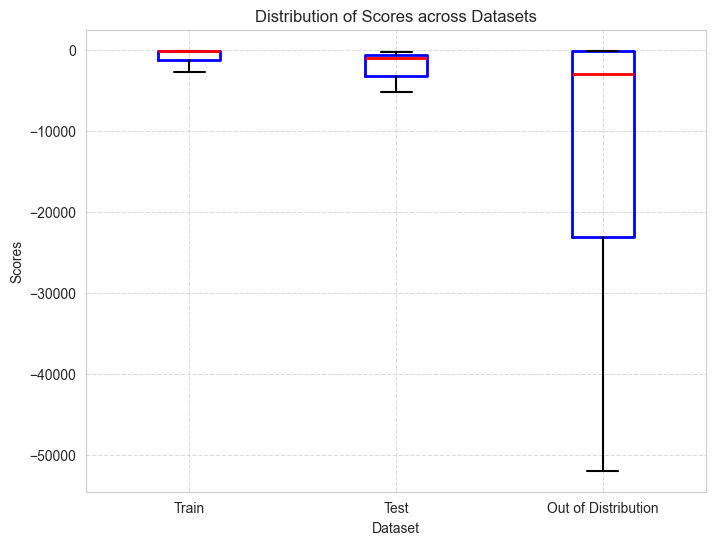

In [22]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

### The Elliptic Envelope algorithm

It's a robust method for detecting outliers in a dataset by assuming that the inlying data are normally distributed. Despite its simplicity, it can perform well when the underlying data conforms to its assumptions. 

* Data Distribution: The Elliptic Envelope assumes that the normal instances are Gaussian distributed. If the inliers in the dataset have a distribution close to Gaussian, the algorithm can effectively model them. Since the majority class (inliers) might follow a somewhat Gaussian distribution, it allows the algorithm to capture the normal patterns well.

* High-Dimensional Data: The Arrhythmia dataset is high-dimensional, with 274 numerical attributes. The Elliptic Envelope algorithm is designed to handle high-dimensional data efficiently. Its approach of fitting an ellipsoid to the dense region of the data helps in identifying outliers even in such complex data spaces.

* Relatively Clean Data: Despite having outliers (15.5% of the data), the dataset may still have a clear separation between inliers and outliers. If the outliers are well-separated from the majority of the data points, the Elliptic Envelope can effectively detect them.

### IRW

In [21]:
model_irw = IRW_score.IRWDepth(contamination=contamination)
model_irw.fit(X_train)

Fitted IRWDepth model with 1000 projections in 274 dimensions.


True

In [22]:
model_irw._threshold = 0.23

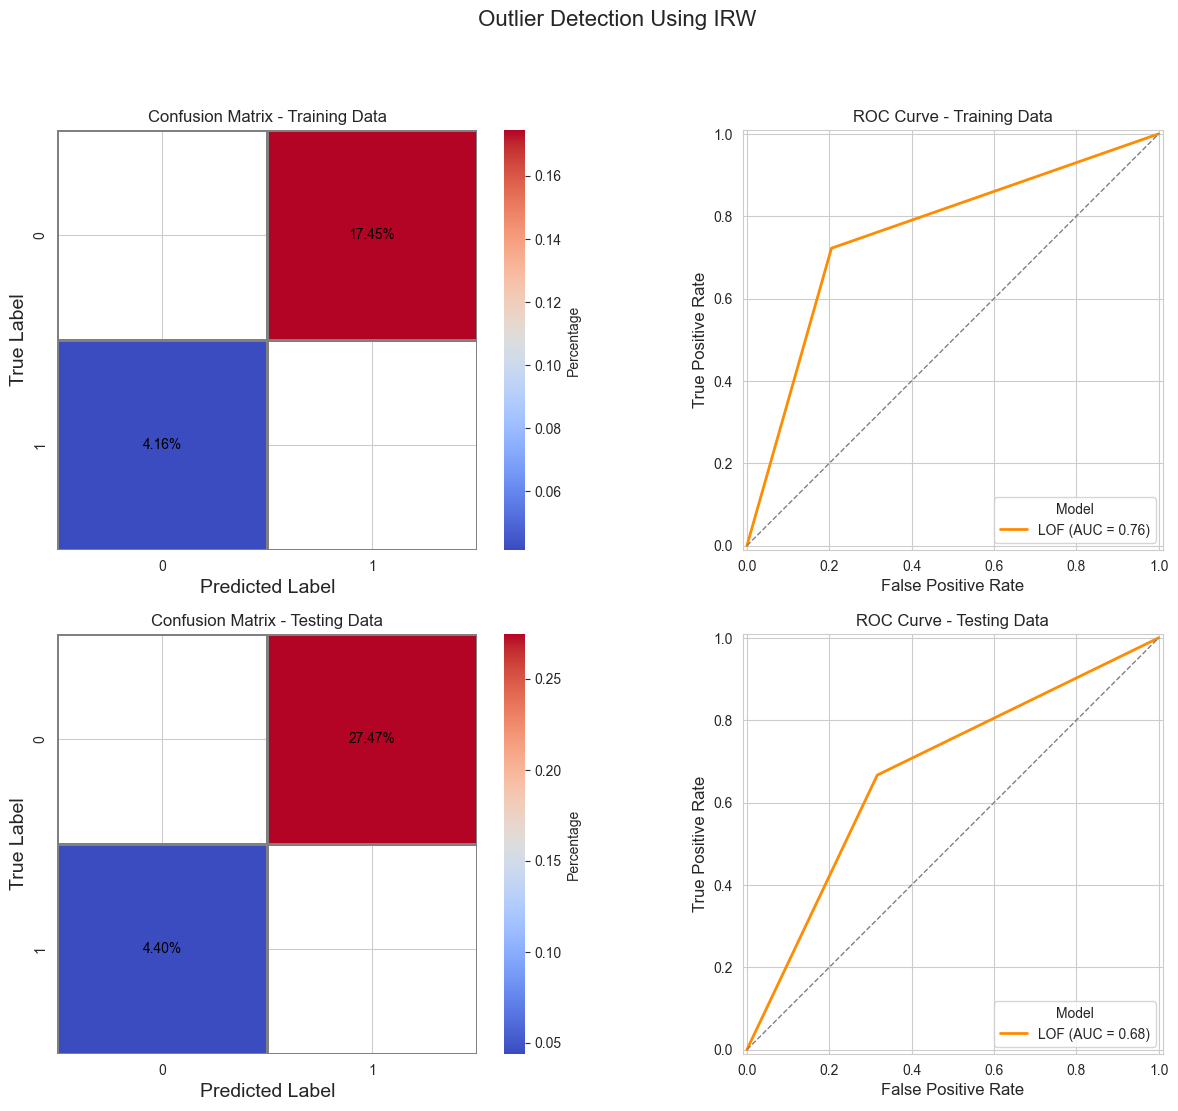

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [23]:
IRW_score.visualize_outliers_irw(X_train, X_test, y_train, y_test, model=model_irw)

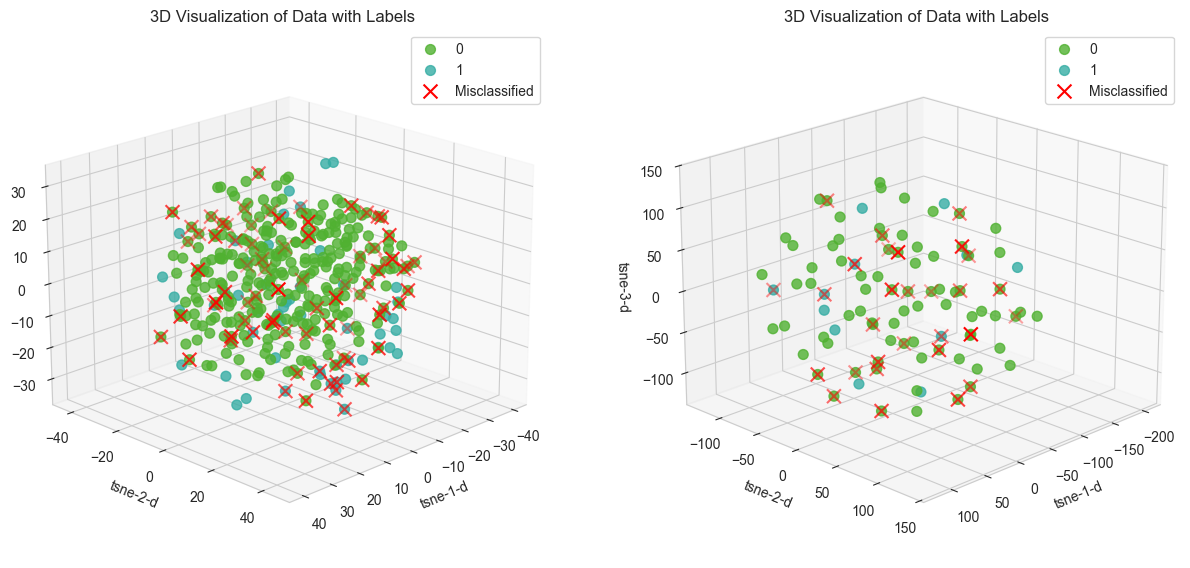

In [24]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, model_irw, model_irw.predict(X_train), lof=False, irw=True)

In [25]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(model_irw,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

Fitted IRWDepth model with 1000 projections in 274 dimensions.
Model fitting completed in 0.01 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


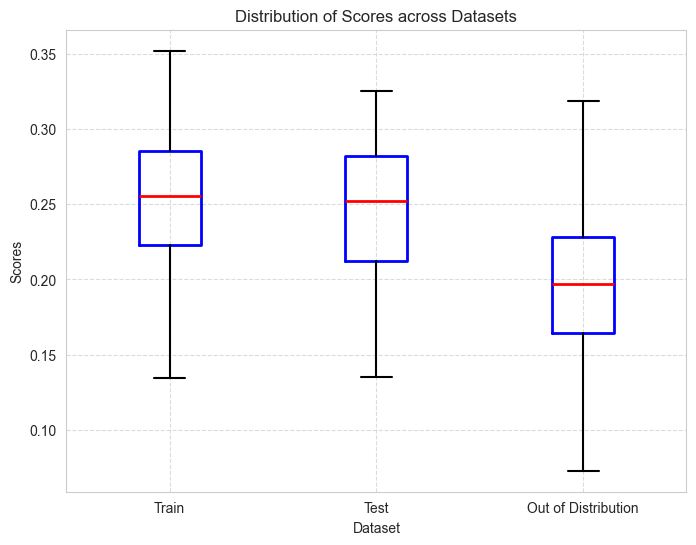

In [26]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

### IRW-DEPTH

* **AUC Scores**: AUC scores of 0.76 on the training data and 0.68 on the test data suggest that the algorithm performs reasonably well in distinguishing between in-distribution and out-of-distribution samples. However, the drop in performance from training to test data indicates some level of overfitting or difficulty in generalizing to unseen data.

* **Random Projections and Monte Carlo Approximation**: The algorithm uses random projections to reduce the dimensionality of the dataset while still capturing important information. In the context of the Arrhythmia dataset, which has a high number of dimensions (274 numerical attributes), random projections help in efficiently representing the data in a lower-dimensional space. Additionally, the Monte Carlo approximation technique used in computing integrated rank-weighted depths aids in estimating complex integrals or expectations efficiently, which is beneficial for handling the high-dimensional nature of the dataset.

* **Beyond Mahalanobis-Based Scores**: While the Arrhythmia dataset may not inherently exhibit Gaussian distributions or adhere to the assumptions of Mahalanobis-based approaches, the IRW_DEPTH algorithm, by going beyond traditional Mahalanobis-based scores, offers a potentially more robust method for identifying outliers in this specific dataset. By leveraging integrated rank-weighted depths, the algorithm may capture nuances and patterns in the data that traditional methods might overlook.

* **Rank-Weighted Depths**: Rather than solely relying on distance-based metrics like Mahalanobis distance, the algorithm calculates integrated rank-weighted depths. This approach considers the relative ranks of data points within the random projections, allowing the algorithm to capture the underlying structure of the data more effectively. In the context of the Arrhythmia dataset, which might have complex relationships between attributes indicative of arrhythmic conditions, rank-weighted depths can provide a nuanced understanding of the data distribution.

* **Efficient Model Fitting**: The algorithm's fitting process involves generating random vectors of hypersphere S (U), computing the projection of the data onto these vectors (M), and normalizing the random vectors. This process is computationally efficient and scalable, making it suitable for large datasets like Arrhythmia with a substantial number of samples (452 instances).